In [1]:
# Importing required libraries.
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
import tensorflow as tf
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 

In [2]:
base_dir = r'D:\User Data\Desktop\nishant\Projects\Flower Detection System\category_wise' 
img_size = 224
batch = 64

In [3]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True, 
                                   validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2) 
  
# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(img_size, img_size), 
                                                  subset='training',batch_size=batch, class_mode='categorical') 

test_datagen = test_datagen.flow_from_directory(base_dir,target_size=(img_size, img_size), 
                                                subset='validation',batch_size=batch, class_mode='categorical') 

Found 6587 images belonging to 102 classes.
Found 1602 images belonging to 102 classes.


In [4]:
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (224, 224, 3))

In [5]:
for layers in vgg19.layers:
    layers.trainable = False
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
model = Sequential() 
model.add(vgg19)
model.add(Flatten()) 
model.add(Dense(128)) 
model.add(Activation('relu')) 
model.add(Dense(102, activation="softmax")) 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 102)               13158     
                                                                 
Total params: 23248934 (88.69 MB)
Trainable params: 3224550 (12.30 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


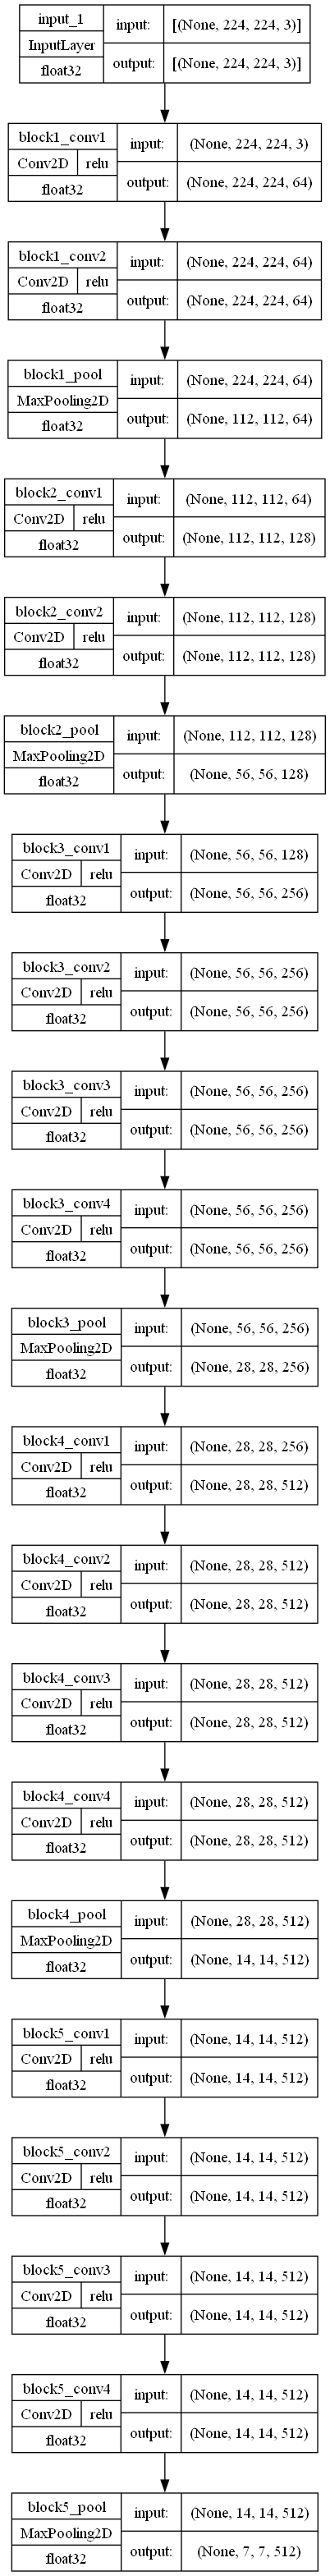

In [8]:
from tensorflow.keras.utils import plot_model
plot_model( 
    vgg19, 
    show_shapes = True, 
    show_dtype = True, 
    show_layer_activations = True
)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy']) 

In [11]:
epochs=5
History = model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/5
103/103 [==============================] - 3582s 35s/step - loss: 4.2083 - accuracy: 0.0805 - val_loss: 3.7962 - val_accuracy: 0.1486
Epoch 2/5
103/103 [==============================] - 3608s 35s/step - loss: 3.3478 - accuracy: 0.2179 - val_loss: 3.0030 - val_accuracy: 0.2803
Epoch 3/5
103/103 [==============================] - 3620s 35s/step - loss: 2.6563 - accuracy: 0.3437 - val_loss: 2.5664 - val_accuracy: 0.3564
Epoch 4/5
103/103 [==============================] - 3664s 36s/step - loss: 2.2800 - accuracy: 0.4152 - val_loss: 2.3337 - val_accuracy: 0.4070
Epoch 5/5
103/103 [==============================] - 3696s 36s/step - loss: 2.0202 - accuracy: 0.4753 - val_loss: 2.2721 - val_accuracy: 0.4139


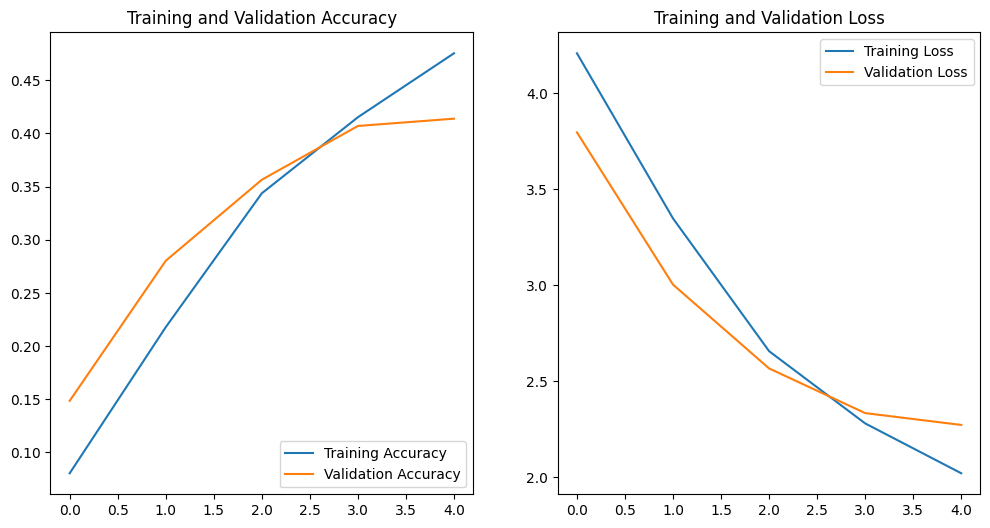

In [18]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

loss = History.history['loss']
val_loss = History.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
from tensorflow.keras.models import load_model 
model.save('Model_vgg19.h5') 
   
# load model 
savedModel=load_model('Model_vgg19.h5')

C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
indices_dict = train_datagen.class_indices
#Creating list for mapping 
list_ = list(indices_dict.keys())
print(list_)

['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'ball moss', 'balloon flower', 'barbeton daisy', 'bearded iris', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', "colt's foot", 'columbine', 'common dandelion', 'corn poppy', 'cyclamen', 'daffodil', 'desert-rose', 'english marigold', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'japanese anemone', 'king protea', 'lenten rose', 'lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican aster', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'orange da

In [33]:
from keras.preprocessing import image 

 
def Test(img_path):
    #Input image
    test_image = image.load_img(img_path,target_size=(224,224)) 
    #For show image 
    plt.imshow(test_image) 
    test_image = image.img_to_array(test_image) 
    test_image = np.expand_dims(test_image,axis=0) 
    # Result array 
    result = savedModel.predict(test_image) 
    
    #Mapping result array with the main name list 
    result = list(result[0])
    i = result.index(max(result))
    print(list_[i]) 
            


1/1 [==============================] - 0s 453ms/step
sunflower


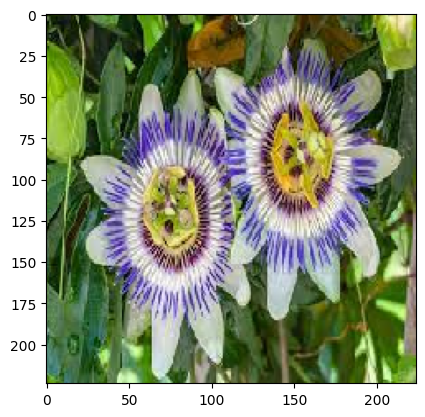

In [36]:
Test("Test Images\img3.jpg")

In [1]:
img_dict = {'passion flower': ['image_00150.jpg'],
 'water lily': ['image_00321.jpg'],
 'cyclamen ': ['image_00461.jpg'],
 'watercress': ['image_00778.jpg'],
 'frangipani': ['image_00846.jpg'],
 'wallflower': ['image_01033.jpg'],
 'rose': ['image_01191.jpg'],
 'petunia': ['image_01459.jpg'],
 'poinsettia': ['image_01551.jpg'],
 'clematis': ['image_01596.jpg'],
 'hibiscus': ['image_01819.jpg'],
 'lotus': ['image_01946.jpg'],
 'anthurium': ['image_02020.jpg'],
 'thorn apple': ['image_02070.jpg'],
 'barbeton daisy': ['image_02283.jpg'],
 'sword lily': ['image_02330.jpg'],
 'morning glory': ['image_02469.jpg'],
 'columbine': ['image_02637.jpg'],
 'geranium': ['image_02727.jpg'],
 'bishop of llandaff': ['image_02802.jpg'],
 'tree mallow': ['image_02880.jpg'],
 'pink-yellow dahlia': ['image_03027.jpg'],
 'bee balm': ['image_03055.jpg'],
 'snapdragon': ['image_03116.jpg'],
 'californian poppy': ['image_03226.jpg'],
 'bird of paradise': ['image_03315.jpg'],
 'fritillary': ['image_03380.jpg'],
 'sweet william': ['image_03461.jpg'],
 'azalea': ['image_03596.jpg'],
 'primula': ['image_03717.jpg'],
 'cape flower': ['image_07293.jpg'],
 'purple coneflower': ['image_03838.jpg'],
 "colt's foot": ['image_04014.jpg'],
 'artichoke': ['image_04131.jpg'],
 'wild pansy': ['image_04211.jpg'],
 'peruvian lily': ['image_04287.jpg'],
 'ruby-lipped cattleya': ['image_04358.jpg'],
 'canna lily': ['image_04428.jpg'],
 'gazania': ['image_04488.jpg'],
 'lenten rose': ['image_04561.jpg'],
 'buttercup': ['image_04653.jpg'],
 'pelargonium': ['image_04760.jpg'],
 'desert-rose': ['image_04791.jpg'],
 'hippeastrum ': ['image_04870.jpg'],
 'giant white arum lily': ['image_04901.jpg'],
 'marigold': ['image_04963.jpg'],
 'orange dahlia': ['image_05023.jpg'],
 'hard-leaved pocket orchid': ['image_05107.jpg'],
 'english marigold': ['image_05166.jpg'],
 'stemless gentian': ['image_05277.jpg'],
 'tree poppy': ['image_05280.jpg'],
 'pincushion flower': ['image_05377.jpg'],
 'sunflower': ['image_05409.jpg'],
 'magnolia': ['image_05511.jpg'],
 'osteospermum': ['image_05525.jpg'],
 'garden phlox': ['image_05605.jpg'],
 'sweet pea': ['image_05635.jpg'],
 'daffodil': ['image_05721.jpg'],
 'king protea': ['image_05750.jpg'],
 'great masterwort': ['image_05814.jpg'],
 'black-eyed susan': ['image_05863.jpg'],
 'bearded iris': ['image_05939.jpg'],
 'windflower': ['image_05963.jpg'],
 'ball moss': ['image_06026.jpg'],
 'spear thistle': ['image_06064.jpg'],
 'silverbush': ['image_06103.jpg'],
 'balloon flower': ['image_06193.jpg'],
 'oxeye daisy': ['image_06211.jpg'],
 'cautleya spicata': ['image_06252.jpg'],
 'common dandelion': ['image_06533.jpg'],
 'yellow iris': ['image_06382.jpg'],
 'monkshood': ['image_06421.jpg'],
 'love in the mist': ['image_06474.jpg'],
 'corn poppy': ['image_06499.jpg'],
 'grape hyacinth': ['image_06583.jpg'],
 'canterbury bells': ['image_06648.jpg'],
 'globe-flower': ['image_06668.jpg'],
 'toad lily': ['image_06713.jpg'],
 'pink primrose': ['image_06740.jpg'],
 'fire lily': ['image_06774.jpg'],
 'red ginger': ['image_08053.jpg'],
 'prince of wales feathers': ['image_06862.jpg'],
 'carnation': ['image_06903.jpg'],
 'mexican aster': ['image_06951.jpg'],
 'alpine sea holly': ['image_06970.jpg'],
 'siam tulip': ['image_07040.jpg'],
 'spring crocus': ['image_07054.jpg'],
 'globe thistle': ['image_07086.jpg'],
 'bolero deep blue': ['image_07140.jpg'],
 'tiger lily': ['image_07167.jpg'],
 'moon orchid': ['image_07214.jpg'],
 'foxglove': ['image_08129.jpg'],
 'bougainvillea': ['image_08156.jpg'],
 'camellia': ['image_07437.jpg'],
 'mallow': ['image_07488.jpg'],
 'mexican petunia': ['image_07623.jpg'],
 'bromelia': ['image_07707.jpg'],
 'blanket flower': ['image_07792.jpg'],
 'trumpet creeper': ['image_07861.jpg'],
 'blackberry lily': ['image_07934.jpg'],
 'gaura': ['image_07970.jpg'],
 'japanese anemone': ['image_08023.jpg']}


In [2]:

list_ = ['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'ball moss', 'balloon flower', 'barbeton daisy', 'bearded iris', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', "colt's foot", 'columbine', 'common dandelion', 'corn poppy', 'cyclamen', 'daffodil', 'desert-rose', 'english marigold', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'japanese anemone', 'king protea', 'lenten rose', 'lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican aster', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'orange dahlia', 'osteospermum', 'oxeye daisy', 'passion flower', 'pelargonium', 'peruvian lily', 'petunia', 'pincushion flower', 'pink primrose', 'pink-yellow dahlia', 'poinsettia', 'primula', 'prince of wales feathers', 'purple coneflower', 'red ginger', 'rose', 'ruby-lipped cattleya', 'siam tulip', 'silverbush', 'snapdragon', 'spear thistle', 'spring crocus', 'stemless gentian', 'sunflower', 'sweet pea', 'sweet william', 'sword lily', 'thorn apple', 'tiger lily', 'toad lily', 'tree mallow', 'tree poppy', 'trumpet creeper', 'wallflower', 'water lily', 'watercress', 'wild pansy', 'windflower', 'yellow iris']


In [3]:
from tensorflow.keras.models import load_model
model = load_model('Model_vgg19.h5')

In [6]:
# get accuracy:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
Images = list(img_dict.values())
category = list(img_dict.keys())
correct = 0

for i in range(len(Images)):
    img_path =  "Flower Images\\"+Images[i][0]
    test_image = load_img(img_path,target_size=(224,224)) 
    test_image = img_to_array(test_image) 
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)
    try:
        index = list(result[0]).index(max(list(result[0])))
        ans = list_[index]
        if ans==category[i]: correct+=1
    except:
        print(img_path)

1/1 [==============================] - 0s 437ms/step


In [7]:
total = 102
accuracy = (correct/total)*100
print(accuracy)

17.647058823529413
